**Cài đặt thư viện để sử dụng file notebook đã thực hiện tiền xử lý dữ liệu**
- ```!pip install import-ipynb```

In [1]:
import import_ipynb
from companies import df_companies
from jobs import df_job
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import random as rd

importing Jupyter notebook from companies.ipynb
14
2041
False
company_id         object
company_name       object
average_rating    float64
num_review         object
city               object
type               object
num_employee       object
country            object
working_day        object
OT                 object
overview           object
expertise          object
benifit            object
logo_link          object
dtype: object
company_id   {<class 'str'>}
company_name   {<class 'str'>}
average_rating   {<class 'float'>}
num_review   {<class 'str'>}
city   {<class 'str'>}
type   {<class 'str'>}
num_employee   {<class 'str'>}
country   {<class 'str'>}
working_day   {<class 'float'>, <class 'str'>}
OT   {<class 'float'>, <class 'str'>}
overview   {<class 'float'>, <class 'str'>}
expertise   {<class 'float'>, <class 'str'>}
benifit   {<class 'float'>, <class 'str'>}
logo_link   {<class 'str'>}
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2041 entries, 0 to 2040
Data columns (

## Đặt câu hỏi ##

**Câu hỏi 4: Những công ty nước ngoài có số nhân viên trên 1000 thuộc những nước nào, số lượng, tỉ lệ ra sao và tỉ lệ Outsourcing cho từng nước?**

In [2]:
id_company = df_companies.loc[(df_companies.num_employee == 1001) & (df_companies.country != 'Vietnam')]['company_id'].values

df = df_companies[df_companies['company_id'].isin(id_company)].copy()

number_companies = df.groupby('country').size()
number_companies_df = number_companies.to_frame()
number_companies_df = number_companies_df.rename(columns={0: 'num_companies'})

df_rows = df.shape[0]

ratio_companies_sr = ((number_companies/df_rows)*100).round(1)

#ratio_sr
df_outsource = df[df.type == 'Outsourcing']
num_outsource = df_outsource.groupby(['country'])['type'].size()
ratio_outsource_sr = ((num_outsource/number_companies)*100).round(1)

ratio_companies_df = ratio_companies_sr.to_frame()
ratio_companies_df = ratio_companies_df.rename(columns={0: 'ratio_num_companies'})

ratio_outsource_df = ratio_outsource_sr.to_frame()
ratio_outsource_df = ratio_outsource_df.rename(columns={0: 'ratio_oursourcing'})

frames = [number_companies_df, ratio_companies_df, ratio_outsource_df]
country_df = pd.concat(frames, axis = 1)

country_df = country_df.fillna(0)

country_df

,num_companies,ratio_num_companies,ratio_oursourcing
country,,,
Australia,2,6.5,50.0
Czechia,1,3.2,0.0
Denmark,1,3.2,100.0
France,2,6.5,50.0
Germany,1,3.2,0.0
Indonesia,1,3.2,0.0
Japan,3,9.7,33.3
"Korea, Republic of",2,6.5,0.0
Philippines,1,3.2,0.0


**Trực quan hóa kết quả**

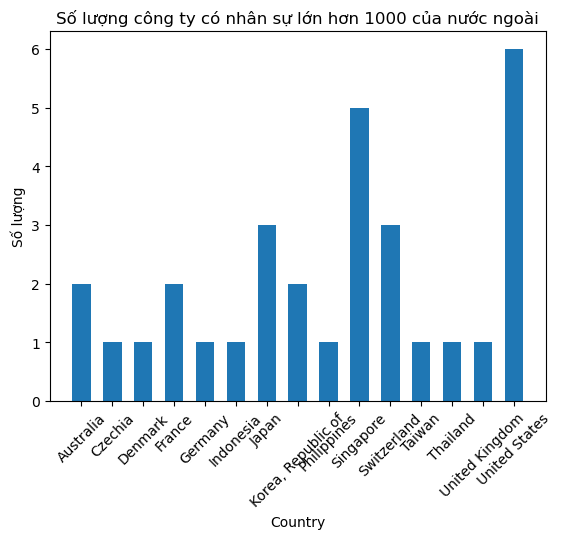

In [3]:
#fig, ax = plt.subplots()
ticks1 = country_df.index.to_list()
values1 = list(country_df.num_companies)

plt.bar(ticks1, values1, width = 0.6)
plt.xticks(rotation=45)

plt.ylabel('Số lượng')
plt.xlabel('Country')
plt.title('Số lượng công ty có nhân sự lớn hơn 1000 của nước ngoài')

plt.show()

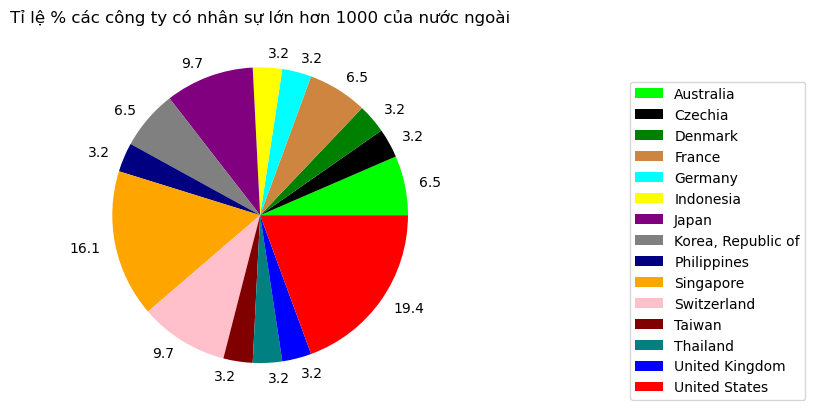

In [4]:
ticks2 = country_df.index.to_list()
values2 = list(country_df.ratio_num_companies)

my_colors = ['maroon', 'black', 'olive', 'teal', 'navy', 'peru', 'red', 'orange', 'yellow', 'lime', 'green', 'cyan', 'blue', 'purple', 'grey', 'pink']
rd.shuffle(my_colors)

plt.pie(values2, labels = values2, colors = my_colors)

plt.title('Tỉ lệ % các công ty có nhân sự lớn hơn 1000 của nước ngoài')
plt.legend(ticks2, loc = [1.5,0])
plt.show()

- Có 15 quốc gia có tổng số lượng công ti lớn hơn 1000 nhân sự ở tập dữ liệu này
- Trong số đó Mỹ và Singapore là 2 quốc gia có số lượng công ti góp mặt là lớn nhất, và đây cũng là 2 thị trường tiềm năng nhất về mặt tuyển dụng nhân sự. 
- Ý nghĩa: cho chúng ta nắm được số lượng những công ty có thể xem là bigtech của một quốc gia là bao nhiêu, và cũng cho ta nắm được xem thị trường tuyển dụng nào là đông đảo nhất với một thị trường outsourcing như Việt Nam.